# Regression Modeling Exercises

In [44]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

import warnings
warnings.filterwarnings("ignore")

# 1. Select a dataset with a continuous target variable.

Target = hwy

In [6]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   displ   234 non-null    float64 
 1   cyl     234 non-null    int64   
 2   cty     234 non-null    int64   
 3   hwy     234 non-null    int64   
 4   bins    234 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 9.6 KB


In [17]:
df = df[['displ', 'cyl', 'cty', 'hwy']]

In [18]:
df.head()

,displ,cyl,cty,hwy
1,1.8,4,18,29
2,1.8,4,21,29
3,2.0,4,20,31
4,2.0,4,21,30
5,2.8,6,16,26


In [19]:
def split_stratify_continuous(df, target, bins=5):
    binned_y = pd.cut(df[target], bins=bins, labels=list(range(bins)))
    df["bins"] = binned_y
    train_validate, test = train_test_split(df, stratify=df["bins"], test_size=0.2, random_state=123)
    train, validate = train_test_split(train_validate, stratify=train_validate["bins"], test_size=0.3, random_state=123)
    train = train.drop(columns=["bins"])
    validate = validate.drop(columns=["bins"])
    test = test.drop(columns=["bins"])
    return train, test, validate

In [22]:
train, test, validate = split_stratify_continuous(df, 'hwy', bins=5)

In [23]:
train.shape, test.shape, validate.shape

((130, 4), (47, 4), (57, 4))

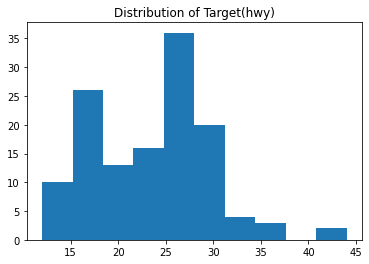

In [33]:
# how do we determine distribution?
plt.hist(y_train)
plt.title('Distribution of Target(hwy)')
plt.show()

In [28]:
# split train into X (dataframe, drop target) & y (series, keep target only)
X_train = train.drop(columns='hwy')
y_train = train['hwy']

# split validate into X (dataframe, drop target) & y (series, keep target only)
X_validate = validate.drop(columns='hwy')
y_validate = validate['hwy']

# split test into X (dataframe, drop target) & y (series, keep target only)
X_test = test.drop(columns='hwy')
y_test = test['hwy']

In [35]:
#Convert series into pandas df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)


In [36]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [39]:
# 1. Predict hwy_pred_mean
hwy_pred_mean = y_train.hwy.mean()
y_train['hwy_pred_mean'] = hwy_pred_mean
y_validate['hwy_pred_mean'] = hwy_pred_mean

# 2. compute hwy_pred_median
hwy_pred_median = y_train.hwy.median()
y_train['hwy_pred_median'] = hwy_pred_median
y_validate['hwy_pred_median'] = hwy_pred_median

# 3. RMSE of hwy_pred_mean
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.hwy, y_validate.hwy_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of hwy_pred_median
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_median) ** .5
rmse_validate = mean_squared_error(y_train.hwy, y_train.hwy_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  6.03 
Validate/Out-of-Sample:  5.52
RMSE using Median
Train/In-Sample:  6.12 
Validate/Out-of-Sample:  6.12


### Takeaways:
- The baseline model (mean) is off by 6.03 mpg on in-sample data and 5.52 mpg on out of sample data. 
- Baseline model (median) is off by 6.12 mpg for both insample and out of sample data

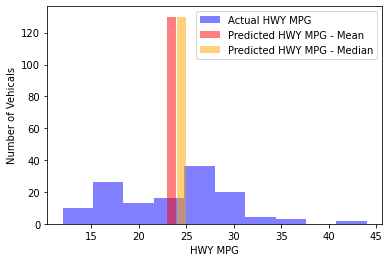

In [40]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.hwy, color='blue', alpha=.5, label="Actual HWY MPG")
plt.hist(y_train.hwy_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted HWY MPG - Mean")
plt.hist(y_train.hwy_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted HWY MPG - Median")
plt.xlabel("HWY MPG")
plt.ylabel("Number of Vehicals")
plt.legend()
plt.show()

In [41]:
y_train.head()

,hwy,hwy_pred_mean,hwy_pred_median
2,29,23.453846,24.5
31,15,23.453846,24.5
66,12,23.453846,24.5
151,17,23.453846,24.5
205,19,23.453846,24.5


In [42]:
#Create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. 
lm.fit(X_train, y_train.hwy)

# Make predictions
y_train['hwy_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_lm) ** (1/2)

# predict validate
y_validate['hwy_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.hwy, y_validate.hwy_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.851891413499407 
Validation/Out-of-Sample:  1.5683417803930657


In [43]:
#Create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train, y_train.hwy)

# make predictions on train
y_train['hwy_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_lm) ** (1/2)

# predict on validate
y_validate['hwy_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.hwy, y_validate.hwy_pred_lm) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.851891413499407 
Validation/Out-of-Sample:  1.5683417803930657


In [96]:
#Create the model object
glm = TweedieRegressor(power=0, alpha=1)


# fit the model to our training data. 
glm.fit(X_train, y_train.hwy)

# predict train
y_train['hwy_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_glm) ** (1/2)

# predict validate
y_validate['hwy_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.hwy, y_train.hwy_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=1\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=0 & alpha=1
Training/In-Sample:  1.8993725439159 
Validation/Out-of-Sample:  1.8993725439159


In [46]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [47]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data.
lm2.fit(X_train, y_train.hwy)

# predict train
y_train['hwy_pred_lm2'] = lm2.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.hwy, y_train.hwy_pred_lm2) ** (1/2)

# predict validate
y_validate['hwy_pred_lm2'] = lm2.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.hwy, y_validate.hwy_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.851891413499407 
Validation/Out-of-Sample:  2.459695940126491


## Plotting Actual vs. Predicted Values

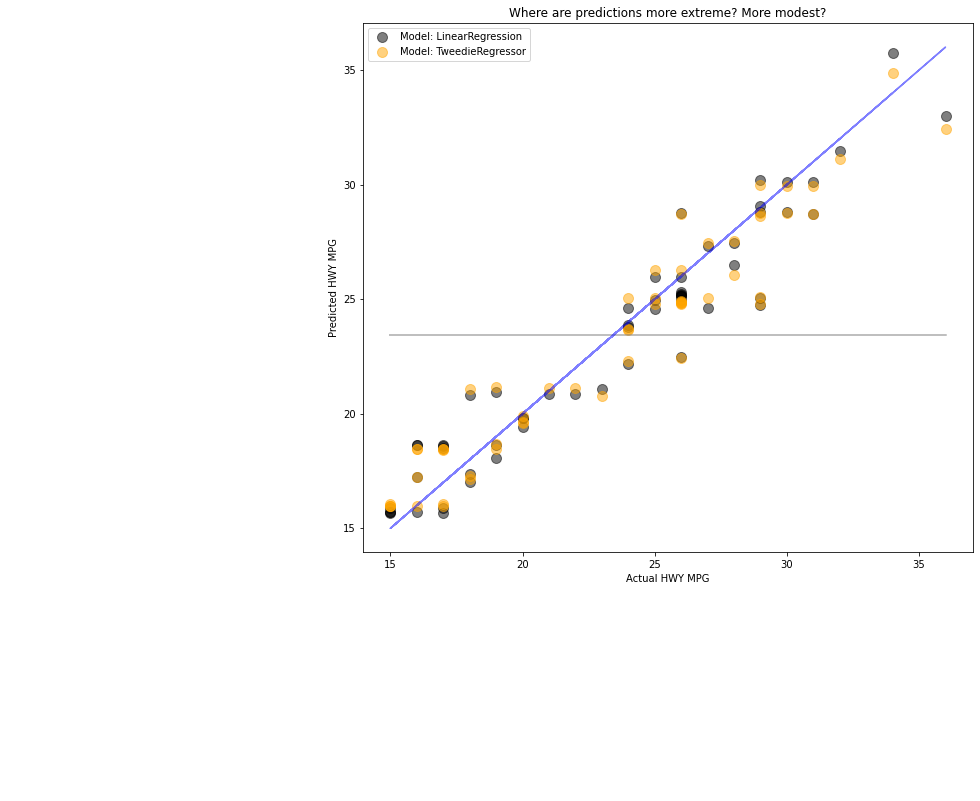

In [99]:
plt.figure(figsize=(16,12))
plt.plot(y_validate.hwy, y_validate.hwy_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.hwy, y_validate.hwy, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.hwy, y_validate.hwy_pred_lm, 
            alpha=.5, color="black", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.hwy, y_validate.hwy_pred_glm, 
            alpha=.5, color="orange", s=100, label="Model: TweedieRegressor")
#plt.scatter(y_validate.hwy, y_validate.hwy_pred_lm2, 
#            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual HWY MPG")
plt.ylabel("Predicted HWY MPG")
plt.title("Where are predictions more extreme? More modest?")
plt.tight_layout()
plt.show()


## Residual Plots: Plotting the Errors in Predictions

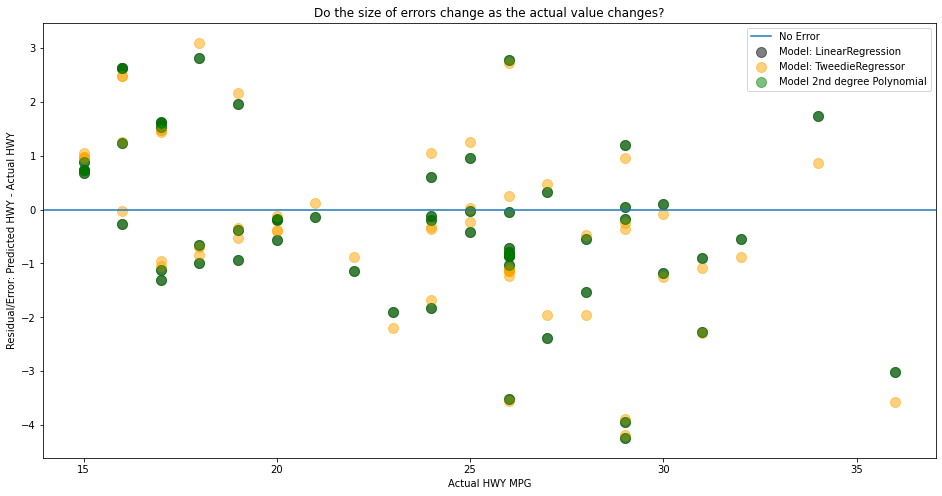

In [101]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.hwy, y_validate.hwy_pred_lm-y_validate.hwy, 
            alpha=.5, color="black", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.hwy, y_validate.hwy_pred_glm-y_validate.hwy, 
            alpha=.5, color="orange", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.hwy, y_validate.hwy_pred_lm2-y_validate.hwy, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual HWY MPG")
plt.ylabel("Residual/Error: Predicted HWY - Actual HWY")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

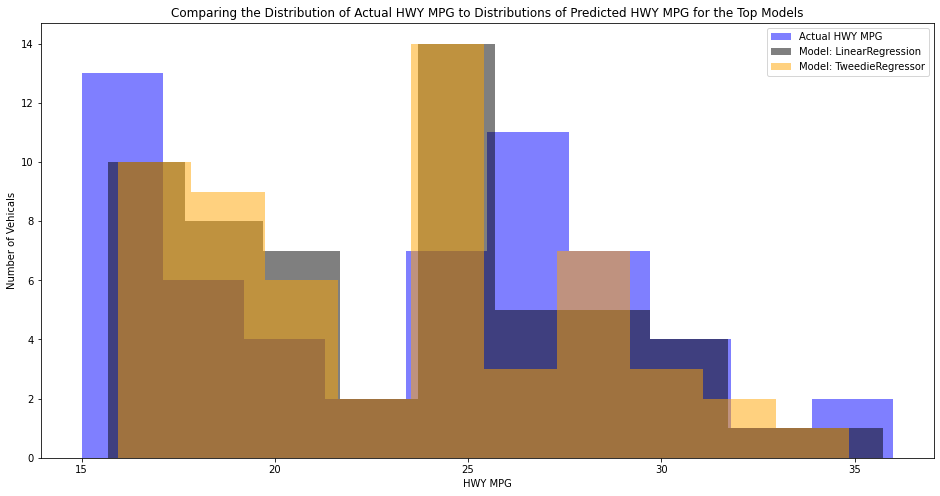

In [102]:
plt.figure(figsize=(16,8))
plt.hist(y_validate.hwy, color='blue', alpha=.5, label="Actual HWY MPG")
plt.hist(y_validate.hwy_pred_lm, color='black', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.hwy_pred_glm, color='orange', alpha=.5, label="Model: TweedieRegressor")
#plt.hist(y_validate.hwy_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("HWY MPG")
plt.ylabel("Number of Vehicals")
plt.title("Comparing the Distribution of Actual HWY MPG to Distributions of Predicted HWY MPG for the Top Models")
plt.legend()
plt.show()

**Linear Rgeression appears to be the best model for predicting hwy mphg. Proceed to evaluate the OLS model on the test data set:**

In [94]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['hwy_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.hwy, y_test.hwy_pred_lm)**1/2

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  1.3025105571643594
